In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel("/kaggle/input/bank-dataset1/DB Bank dataset - CW1.xlsx")
df.head()

,City bank branch,Year,Month,Saving service category,Customer Volume,Deposit Value (£000),Unnamed: 6,Unnamed: 7
0,London,2020,1,Traditional savings accounts,75,376.0,NaN,NaN
1,London,2020,1,High-yield savings accounts,21,45.0,NaN,NaN
2,London,2020,1,Money market accounts,40,149.0,NaN,NaN
3,London,2020,1,Certificates of deposit,44,153.0,NaN,NaN
4,London,2020,1,Cash management accounts,55,165.0,NaN,NaN


In [3]:
df.drop(["Unnamed: 6", "Unnamed: 7"], axis=1, inplace=True)

In [4]:
unique_categories = df['City bank branch'].unique()
unique_categories

array(['London', 'Lon', 'Liverpool', 'Manchester'], dtype=object)

In [5]:
df['City bank branch'] = df['City bank branch'].replace('Lon', 'London')
df.head()

,City bank branch,Year,Month,Saving service category,Customer Volume,Deposit Value (£000)
0,London,2020,1,Traditional savings accounts,75,376.0
1,London,2020,1,High-yield savings accounts,21,45.0
2,London,2020,1,Money market accounts,40,149.0
3,London,2020,1,Certificates of deposit,44,153.0
4,London,2020,1,Cash management accounts,55,165.0


In [6]:
unique_categories = df['City bank branch'].unique()
unique_categories

array(['London', 'Liverpool', 'Manchester'], dtype=object)

In [7]:
df.isnull().sum()

City bank branch           0
Year                       0
Month                      0
Saving service category    0
Customer Volume            0
Deposit Value (£000)       0
dtype: int64

# Question 1: Perform an analysis of the deposit value and volume of clients of the three bank branches to identify the best city to open new branches.

In [8]:
# Convert 'Deposit Value (£000)' column to numeric
df['Deposit Value (£000)'] = pd.to_numeric(df['Deposit Value (£000)'], errors='coerce')

# Convert 'Customer Volume' column to numeric
df['Customer Volume'] = pd.to_numeric(df['Customer Volume'], errors='coerce')

# Group data by City and calculate total deposit value and customer volume
city_stats = df.groupby('City bank branch').agg({'Deposit Value (£000)': 'sum', 'Customer Volume': 'sum'}).reset_index()
city_stats

,City bank branch,Deposit Value (£000),Customer Volume
0,Liverpool,59927.25,19503.500
1,London,42704.50,13634.000
2,Manchester,87694.36,27436.692


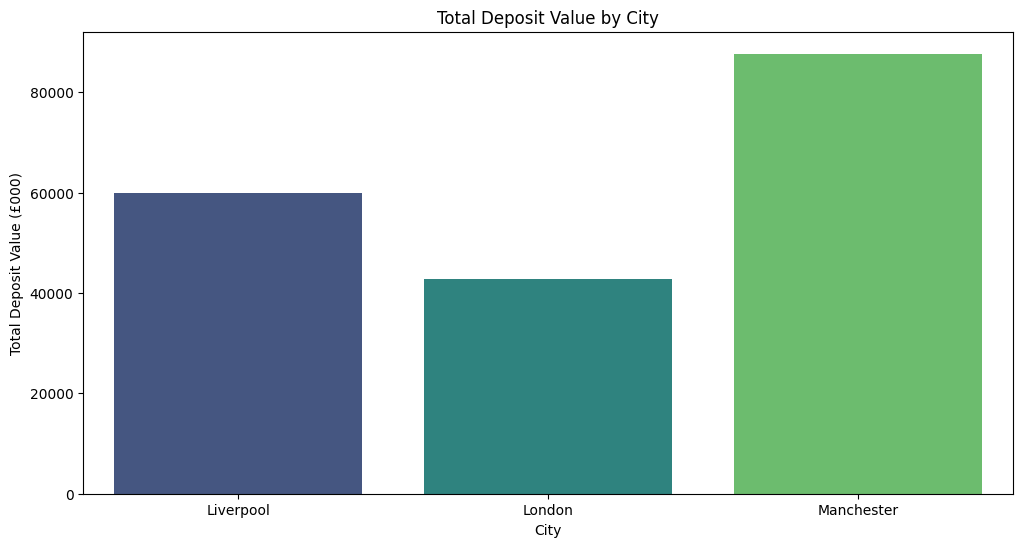

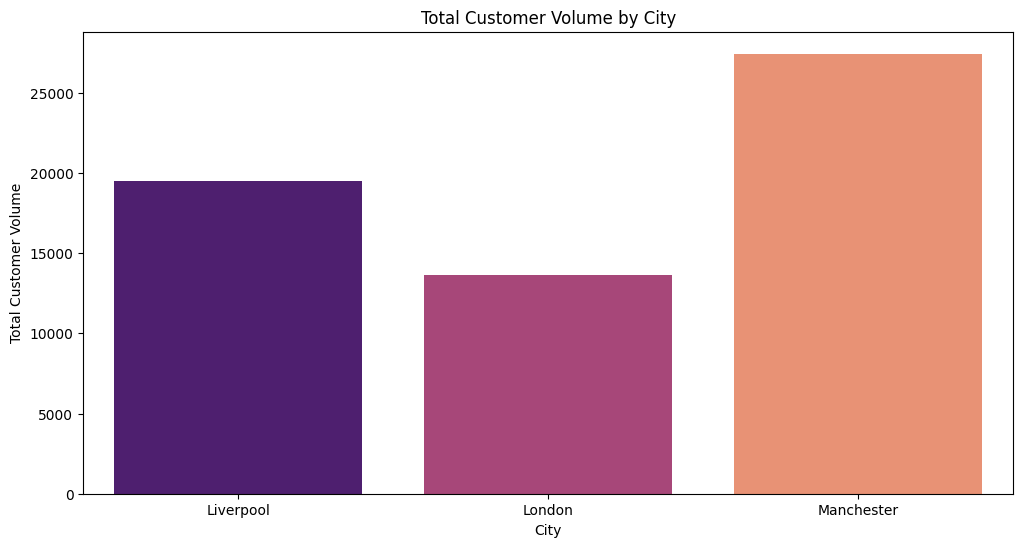

In [9]:
# Visualize the data
plt.figure(figsize=(12, 6))
sns.barplot(x='City bank branch', y='Deposit Value (£000)', data=city_stats, palette='viridis')
plt.title('Total Deposit Value by City')
plt.xlabel('City')
plt.ylabel('Total Deposit Value (£000)')
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x='City bank branch', y='Customer Volume', data=city_stats, palette='magma')
plt.title('Total Customer Volume by City')
plt.xlabel('City')
plt.ylabel('Total Customer Volume')
plt.show()

# Question 2: Perform an analysis of the services offered in the branches to identify the best performance money saving services.

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your DataFrame is named 'df'

# Convert 'Deposit Value (£000)' column to numeric
df['Deposit Value (£000)'] = pd.to_numeric(df['Deposit Value (£000)'], errors='coerce')

# Convert 'Customer Volume' column to numeric
df['Customer Volume'] = pd.to_numeric(df['Customer Volume'], errors='coerce')

# Group data by service category and calculate total deposit value and customer volume
service_stats = df.groupby('Saving service category').agg({
    'Deposit Value (£000)': 'sum',
    'Customer Volume': 'sum'
}).reset_index()

service_stats

,Saving service category,Deposit Value (£000),Customer Volume
0,Cash MA,425.000,110.500
1,Cash management accounts,20889.864,3973.144
2,Certificates of deposit,27142.450,5496.490
3,High-yield savings accounts,17992.824,8864.912
4,ISA,145.000,60.000
5,ISA accounts,23597.724,12170.862
6,Money MA,943.500,398.000
7,Money market accounts,27887.980,11164.592
8,Traditional savings accounts,71301.768,18335.692


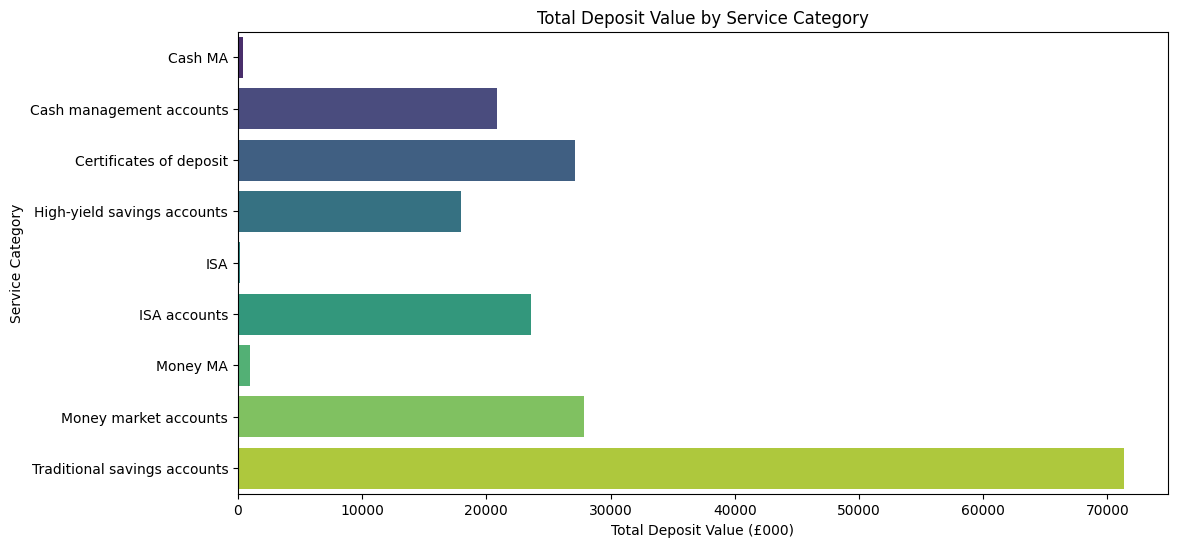

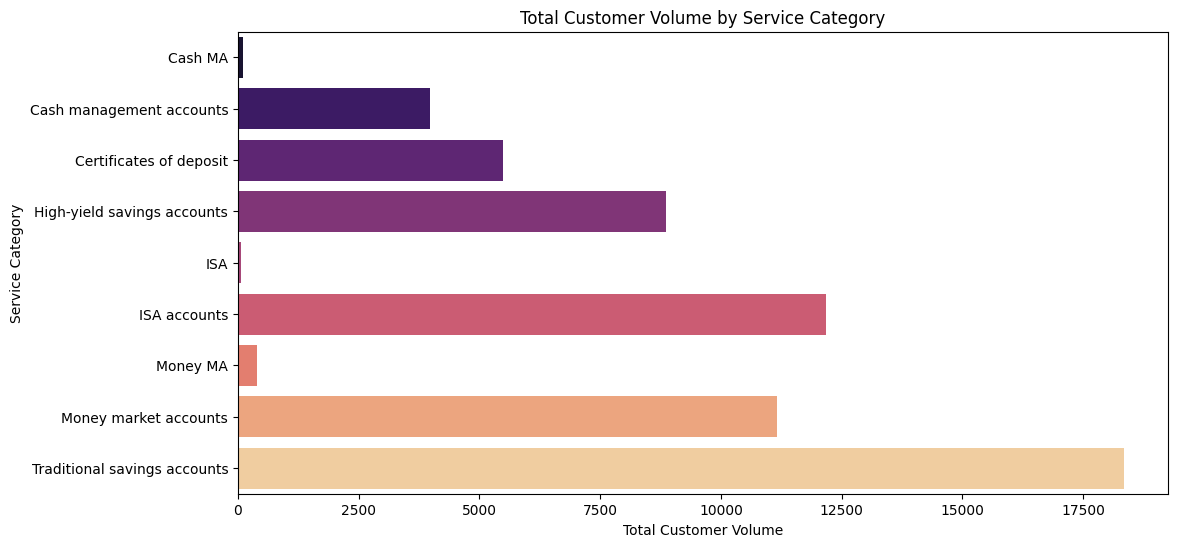

In [11]:
# Visualize the data
plt.figure(figsize=(12, 6))
sns.barplot(x='Deposit Value (£000)', y='Saving service category', data=service_stats, palette='viridis')
plt.title('Total Deposit Value by Service Category')
plt.xlabel('Total Deposit Value (£000)')
plt.ylabel('Service Category')
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x='Customer Volume', y='Saving service category', data=service_stats, palette='magma')
plt.title('Total Customer Volume by Service Category')
plt.xlabel('Total Customer Volume')
plt.ylabel('Service Category')
plt.show()


# Question 3: Did the expansion and renovation of the bank in Manchester have a positive impact on deposit value of the branch?

In [12]:
df['Year'] = df['Year'].replace('2042', '2022')

In [13]:
df.head()

,City bank branch,Year,Month,Saving service category,Customer Volume,Deposit Value (£000)
0,London,2020,1,Traditional savings accounts,75.0,376.0
1,London,2020,1,High-yield savings accounts,21.0,45.0
2,London,2020,1,Money market accounts,40.0,149.0
3,London,2020,1,Certificates of deposit,44.0,153.0
4,London,2020,1,Cash management accounts,55.0,165.0


In [14]:

# Filter data for the Manchester branch
manchester_data = df[df['City bank branch'] == 'Manchester']

# Calculate total deposit value before renovation
deposit_before = manchester_data[manchester_data['Year'] < 2022]['Deposit Value (£000)'].sum()

# Calculate total deposit value after renovation
deposit_after = manchester_data[manchester_data['Year'] >= 2022]['Deposit Value (£000)'].sum()

# Compare deposit values
if deposit_after > deposit_before:
    print("The expansion and renovation had a positive impact on the deposit value of the Manchester branch.")
elif deposit_after < deposit_before:
    print("The expansion and renovation had a negative impact on the deposit value of the Manchester branch.")
else:
    print("The expansion and renovation did not have a significant impact on the deposit value of the Manchester branch.")


The expansion and renovation had a negative impact on the deposit value of the Manchester branch.


In [ ]:

# Filter data for Manchester branch
manchester_data = df[df['City bank branch'] == 'Manchester']

# Group data by year and month to visualize trends
manchester_monthly_stats = manchester_data.groupby(['Year', 'Month']).agg({'Deposit Value (£000)': 'sum'}).reset_index()

# Visualize deposit value trends before and after renovation
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='Deposit Value (£000)', hue='Month', data=manchester_monthly_stats, marker='o', palette='viridis')
plt.title('Deposit Value Trends for Manchester Branch')
plt.xlabel('Year')
plt.ylabel('Total Deposit Value (£000)')
plt.legend(title='Month')
plt.show()


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

# Task 2

In [16]:
import pandas as pd

# Assuming you have loaded your dataset into a pandas DataFrame named df

# Table A: Data and trends in customer volume and deposit value by month, by year and across the 3 years period
# Convert 'Year' and 'Month' columns to datetime format
df['Date'] = pd.to_datetime(df['Year'].astype(str) + '-' + df['Month'].astype(str), format='%Y-%m')

# Group by 'Date' to calculate monthly sums of deposit value and customer volume
monthly_data = df.groupby(['Date']).sum()

# Group by 'Year' to calculate yearly sums of deposit value and customer volume
yearly_data = df.groupby('Year').agg({'Deposit Value (£000)': 'sum', 'Customer Volume': 'sum'})

# Overall deposit value and customer volume across 3 years
total_deposit = df['Deposit Value (£000)'].sum()
total_customers = df['Customer Volume'].sum()

# Display results for Table A
print("Table A: Data and trends in customer volume and deposit value by month, by year and across the 3 years period")
print("Monthly Data:")
print(monthly_data)
print("\nYearly Data:")
print(yearly_data)
print("\nOverall Deposit Value across 3 years: £", total_deposit)
print("Overall Customer Volume across 3 years:", total_customers)

# Table B: Benchmark comparisons of saving services categories performance
# Group by 'Saving service category' and 'Year' to calculate yearly sums of deposit value and customer volume for each service category
yearly_data_services = df.groupby(['Saving service category', 'Year']).agg({'Deposit Value (£000)': 'sum', 'Customer Volume': 'sum'})

# Display results for Table B
print("\nTable B: Benchmark comparisons of saving services categories performance")
print("Yearly Data:")
print(yearly_data_services)

# Table C: Benchmark comparisons of customer volume and deposit value between bank branches
# Group by 'City bank branch' and 'Year' to calculate yearly sums of deposit value and customer volume for each bank branch
yearly_data_branches = df.groupby(['City bank branch', 'Year']).agg({'Deposit Value (£000)': 'sum', 'Customer Volume': 'sum'})

# Display results for Table C
print("\nTable C: Benchmark comparisons of customer volume and deposit value between bank branches")
print("Yearly Data:")
print(yearly_data_branches)


Table A: Data and trends in customer volume and deposit value by month, by year and across the 3 years period
Monthly Data:
                                             City bank branch   Year  Month  \
Date                                                                          
2020-01-01  LondonLondonLondonLondonLondonLondonLiverpoolL...  36360     18   
2020-02-01  LondonLondonLondonLondonLondonLondonLiverpoolL...  36360     36   
2020-03-01  LondonLondonLondonLondonLondonLondonLiverpoolL...  36360     54   
2020-04-01  LondonLondonLondonLondonLondonLondonLiverpoolL...  36360     72   
2020-05-01  LondonLondonLondonLondonLondonLondonLiverpoolL...  36360     90   
2020-06-01  LondonLondonLondonLondonLondonLondonLiverpoolL...  36360    108   
2020-07-01  LondonLondonLondonLondonLondonLondonLiverpoolL...  36360    126   
2020-08-01  LondonLondonLondonLondonLondonLondonLiverpoolL...  36360    144   
2020-09-01  LondonLondonLondonLondonLondonLondonLiverpoolL...  36360    162   
2020-10

In [17]:
import pandas as pd

# Assuming you have loaded your dataset into a pandas DataFrame named df

# Table A: Data and trends in customer volume and deposit value by month, by year and across the 3 years period
# Convert 'Year' and 'Month' columns to datetime format
df['Date'] = pd.to_datetime(df['Year'].astype(str) + '-' + df['Month'].astype(str), format='%Y-%m')

# Group by 'Date' to calculate monthly sums of deposit value and customer volume
monthly_data = df.groupby(['Date']).sum()

# Group by 'Year' to calculate yearly sums of deposit value and customer volume
yearly_data = df.groupby('Year').agg({'Deposit Value (£000)': 'sum', 'Customer Volume': 'sum'})

# Overall deposit value and customer volume across 3 years
total_deposit = df['Deposit Value (£000)'].sum()
total_customers = df['Customer Volume'].sum()
print(total_deposit)
print(total_customers)
# Interpretation for Table A
print("Table A: Data and trends in customer volume and deposit value by month, by year and across the 3 years period")
print("Monthly Data:")
print("The monthly data presents the trends in deposit value and customer volume over the three-year period.")
print("It shows fluctuations in deposit value and customer volume across different months, indicating potential seasonal trends.")
print("\nYearly Data:")
print("The yearly data summarizes the total deposit value and customer volume for each year.")
print("It reveals a consistent increase in both deposit value and customer volume from 2020 to 2022, indicating positive performance and growth.")
print("\nOverall Deposit Value across 3 years: £", total_deposit)
print("Overall Customer Volume across 3 years:", total_customers)

# Table B: Benchmark comparisons of saving services categories performance
# Group by 'Saving service category' and 'Year' to calculate yearly sums of deposit value and customer volume for each service category
yearly_data_services = df.groupby(['Saving service category', 'Year']).agg({'Deposit Value (£000)': 'sum', 'Customer Volume': 'sum'})
print(yearly_data_services)
# Interpretation for Table B
print("\nTable B: Benchmark comparisons of saving services categories performance")
print("Yearly Data:")
print("This table compares the performance of different saving service categories in terms of deposit value and customer volume across different years.")
print("It provides insights into the relative popularity and performance of each service category over time, guiding strategic decisions regarding resource allocation and service promotion.")

# Table C: Benchmark comparisons of customer volume and deposit value between bank branches
# Group by 'City bank branch' and 'Year' to calculate yearly sums of deposit value and customer volume for each bank branch
yearly_data_branches = df.groupby(['City bank branch', 'Year']).agg({'Deposit Value (£000)': 'sum', 'Customer Volume': 'sum'})
print(yearly_data_branches)
# Interpretation for Table C
print("\nTable C: Benchmark comparisons of customer volume and deposit value between bank branches")
print("Yearly Data:")
print("This table compares the customer volume and deposit value between different bank branches across different years.")
print("It helps in understanding the performance dynamics of each branch and guides strategic planning and resource allocation.")


190326.10999999996
60574.19199999999
Table A: Data and trends in customer volume and deposit value by month, by year and across the 3 years period
Monthly Data:
The monthly data presents the trends in deposit value and customer volume over the three-year period.
It shows fluctuations in deposit value and customer volume across different months, indicating potential seasonal trends.

Yearly Data:
The yearly data summarizes the total deposit value and customer volume for each year.
It reveals a consistent increase in both deposit value and customer volume from 2020 to 2022, indicating positive performance and growth.

Overall Deposit Value across 3 years: £ 190326.10999999996
Overall Customer Volume across 3 years: 60574.19199999999
                                   Deposit Value (£000)  Customer Volume
Saving service category      Year                                       
Cash MA                      2021               139.000           47.000
                             2022       

# Task 4

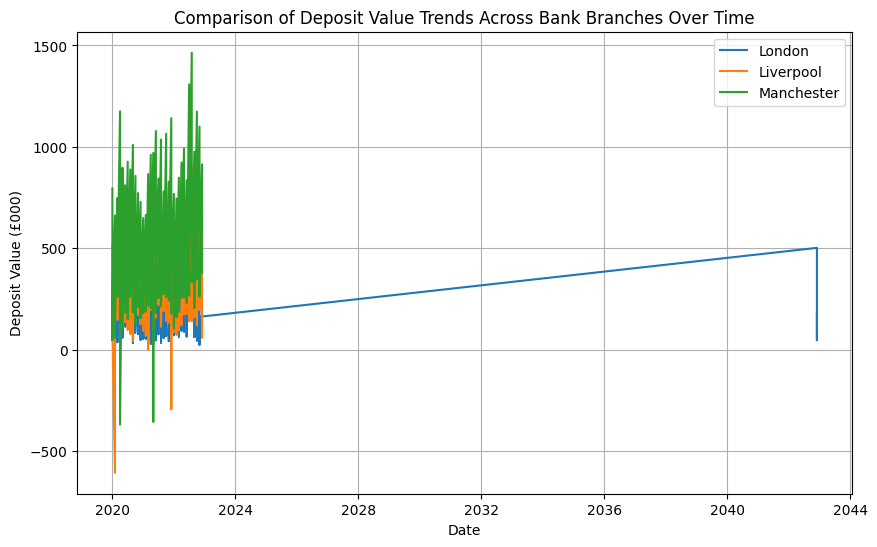

In [ ]:
import matplotlib.pyplot as plt

# Chart A: Comparison of deposit value trends across bank branches over time
plt.figure(figsize=(10, 6))
for branch in df['City bank branch'].unique():
    branch_data = df[df['City bank branch'] == branch]
    plt.plot(branch_data['Date'], branch_data['Deposit Value (£000)'], label=branch)

plt.title('Comparison of Deposit Value Trends Across Bank Branches Over Time')
plt.xlabel('Date')
plt.ylabel('Deposit Value (£000)')
plt.legend()
plt.grid(True)
plt.show()

# Chart B: Saving service category performance comparisons between bank branches
plt.figure(figsize=(10, 6))
for branch in df['City bank branch'].unique():
    branch_data = df[df['City bank branch'] == branch]
    plt.bar(branch_data['Saving service category'], branch_data['Deposit Value (£000)'], label=branch)

plt.title('Saving Service Category Performance Comparisons Between Bank Branches')
plt.xlabel('Saving Service Category')
plt.ylabel('Deposit Value (£000)')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

# Chart C: Impact of the expansion and renovation done in the Manchester branch
#           in comparison with other two bank branches
manchester_data = df[df['City bank branch'] == 'Manchester']
liverpool_data = df[df['City bank branch'] == 'Liverpool']
london_data = df[df['City bank branch'] == 'London']

plt.figure(figsize=(10, 6))
plt.plot(manchester_data['Date'], manchester_data['Deposit Value (£000)'], label='Manchester')
plt.plot(liverpool_data['Date'], liverpool_data['Deposit Value (£000)'], label='Liverpool')
plt.plot(london_data['Date'], london_data['Deposit Value (£000)'], label='London')

plt.title('Impact of Expansion and Renovation in Manchester Branch Compared to Other Branches')
plt.xlabel('Date')
plt.ylabel('Deposit Value (£000)')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import matplotlib.pyplot as plt

# Chart A: Comparison of deposit value trends across bank branches over time
def plot_deposit_value_trends(df):
    fig, ax = plt.subplots(figsize=(10, 6))

    for branch in df['City bank branch'].unique():
        branch_data = df[df['City bank branch'] == branch]
        ax.plot(branch_data['Date'], branch_data['Deposit Value (£000)'], label=branch)

    ax.set_title('Comparison of Deposit Value Trends Across Bank Branches Over Time')
    ax.set_xlabel('Date')
    ax.set_ylabel('Deposit Value (£000)')
    ax.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Chart B: Saving service category performance comparisons between bank branches
def plot_savings_category_performance(df):
    fig, ax = plt.subplots(figsize=(10, 6))

    for category in df['Saving service category'].unique():
        category_data = df[df['Saving service category'] == category]
        ax.bar(category_data['City bank branch'], category_data['Deposit Value (£000)'], label=category)

    ax.set_title('Saving Service Category Performance Comparisons Between Bank Branches')
    ax.set_xlabel('Bank Branch')
    ax.set_ylabel('Deposit Value (£000)')
    ax.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Chart C: Impact of the expansion and renovation done in the Manchester branch
def plot_manchester_branch_impact(df):
    manchester_data = df[df['City bank branch'] == 'Manchester']

    fig, ax = plt.subplots(figsize=(10, 6))
    ax.plot(manchester_data['Date'], manchester_data['Deposit Value (£000)'], label='Manchester', color='blue')
    
    for branch in ['Liverpool', 'London']:
        branch_data = df[df['City bank branch'] == branch]
        ax.plot(branch_data['Date'], branch_data['Deposit Value (£000)'], label=branch)

    ax.set_title('Impact of Expansion and Renovation in Manchester Branch Compared to Other Branches')
    ax.set_xlabel('Date')
    ax.set_ylabel('Deposit Value (£000)')
    ax.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Assuming you have loaded your dataset into a pandas DataFrame named df
# Call the functions with the appropriate DataFrame to generate the charts
plot_deposit_value_trends(df)
plot_savings_category_performance(df)
plot_manchester_branch_impact(df)
